# Univariate Probability Spaces
## Discrete Domains & Distributions

### Definition
Let us create a probability distribution of an experiment that simulates a die. In order to do so, we create a subtype of the [jpt.distributions.univariate.Integer](../autoapi/jpt/distributions/univariate/index.html#jpt.distributions.univariate.Integer) class with the range of values that is typical to a fair dice, namely $\{1, ..., 6\}$:

In [56]:
import np as np

from jpt.distributions import IntegerType

Die = IntegerType('Die', lmin=1, lmax=6)
Die

jpt.distributions.univariate.Die

[jpt.distributions.IntegerType](../autoapi/jpt/distributions/univariate/index.html#jpt.distributions.univariate.IntegerType) is function that dynamically creates a subclass of ``Integer`` with the passed string as its name and configures it with the respective range of integer values given by its lower and upper bounds passed as ``lmin`` and ``lmax`` arguments, respectively.

We can create a specific distribution over these possible outcomes of a toss by instantiating the newly created class and setting the parameters of the distribution object. For example, we create the distribution of a fair dice by assigning all values the uniform distribution and plot it in diagram:

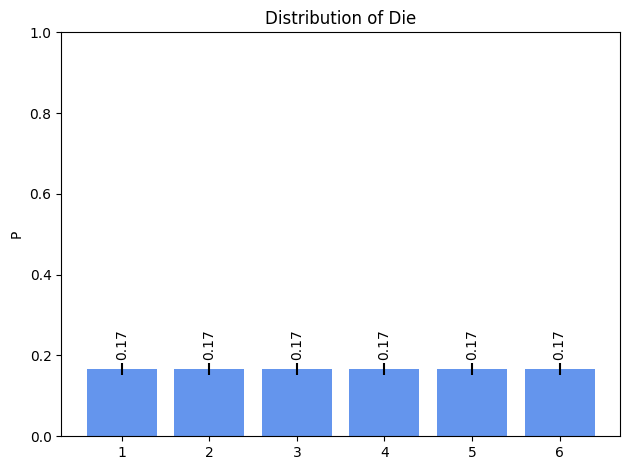

In [57]:
fair_die = Die()
fair_die.set([1 / 6] * 6)
fair_die.plot(view=True)

We can also compute the moments of the distribution like expectation and variance:

In [58]:
fair_die.expectation()

3.5

In [59]:
fair_die.variance()

2.9166666666666665

We can query for the probability of specific events, e.g. the probability that the result of a dice will be ``1``,

In [60]:
fair_die.p(1)

0.16666666666666666

or that the result will be greater than ``3``

In [61]:
fair_die.p({4, 5, 6})

0.5

The most probable events can be obtained from

In [62]:
fair_die.mpe()

(0.16666666666666666, {1, 2, 3, 4, 5, 6})

which are, of course, all values in the uniform distribution at hand.

### Manipulating Distributions

We can manipulate an integer distribution by "cropping" it to a selection of allowed values. All other value will be assigned 0 probability and the remaining values' probability mass gets adjusted proportionally:


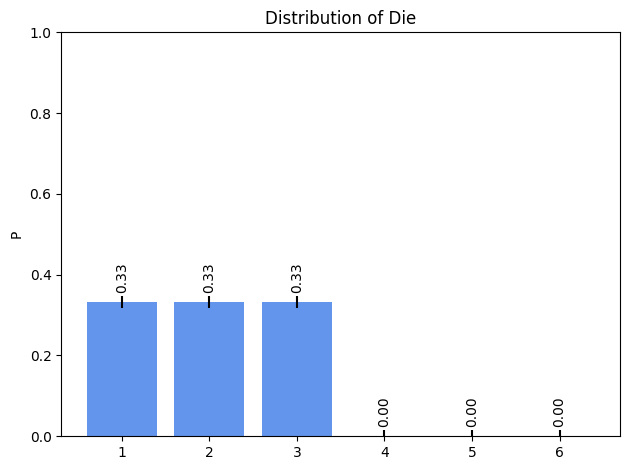

In [63]:
biased_dice = fair_die.crop({1, 2, 3})
biased_dice.plot(view=True)

Note that the original distribution has remained untouched by this operation:

In [64]:
fair_die


<Die p=[1: 0.167; 2: 0.167; 3: 0.167; 4: 0.167; 5: 0.167; 6: 0.167]>

### Learning Distributions from Data

We can use the instantiated object for conducting experiments with the distribution using its [sample()](../autoapi/jpt/distributions/univariate/index.html#jpt.distributions.univariate.Distribution.sample) method:

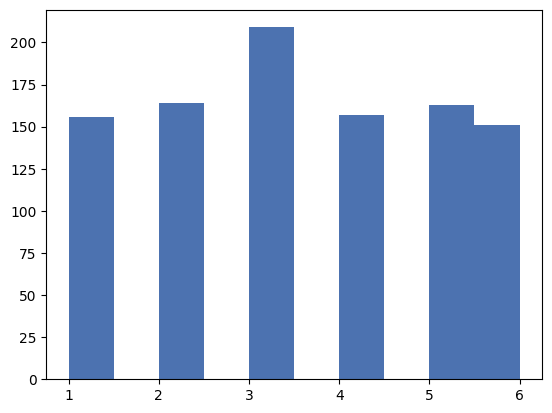

In [65]:
from matplotlib import pyplot as plt
data = list(fair_die.sample(1000))
plt.hist(data)
plt.show()

The parameters of a distribution can be learnt from data using its ``fit()`` method:

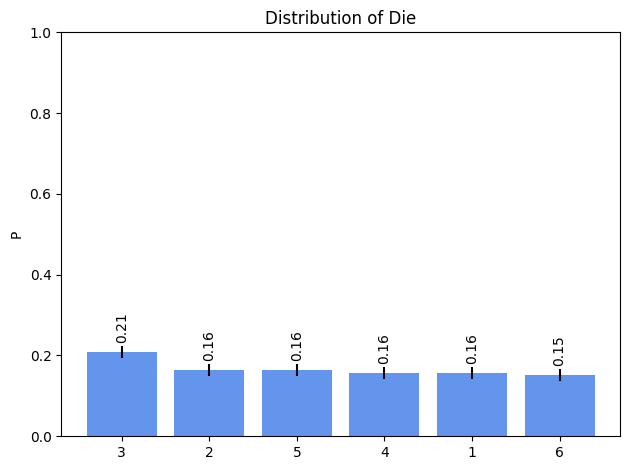

In [66]:
learnt_die = Die()
learnt_die.fit(np.array(data))
learnt_die.plot(view=True)

## Continuous Domains & Distributions

The ``pyjpt`` package provides means for representing and acquiring probabilty distributions of any arbitrary shape over continuous variable domains. As the probability of an event is defined as the area under the probability density function (PDF), single scalar values of variables have 0 probability mass in continuous probability spaces. Therefore, events with non-zero probability must be specified by means of intervals, i.e. continuous sets in $\mathds{R}$.

### Real-valued Sets

``pyjpt`` implements real-valued interval calculus in the [jpt.base.intervals](../autoapi/jpt/base/intervals/index.html) package. Intervals can be represented by instances of the [jpt.base.intervals.ContinuousSet](../autoapi/jpt/base/intervals/index.html#jpt.base.intervals.ContinuousSet) class:

In [67]:
from jpt.base.intervals import ContinuousSet
i1 = ContinuousSet(0, 1)
i2 = ContinuousSet.parse(']2,inf[')
i1, i2

(<ContinuousSet=[0.000,1.000]>, <ContinuousSet=]2.000,∞[>)

The ``ContinuousSet`` class supports both closed, open, and half-open intervals. We can use the [sample()](../autoapi/jpt/base/intervals/index.html#jpt.base.intervals.ContinuousSet.sample) method to draw random samples from the interval,

In [68]:
i1.sample(10)

array([0.620896  , 0.7204676 , 0.69569775, 0.90910982, 0.54725943,
       0.24634574, 0.87016318, 0.0818139 , 0.5648457 , 0.74583764])

and apply the common set operations like [union()](../autoapi/jpt/base/intervals/index.html#jpt.base.intervals.ContinuousSet.union), [intersection()](../autoapi/jpt/base/intervals/index.html#jpt.base.intervals.ContinuousSet.intersection) or [difference()](../autoapi/jpt/base/intervals/index.html#jpt.base.intervals.ContinuousSet.difference):

In [69]:
i1.intersection(ContinuousSet(.25, .75))

<ContinuousSet=[0.250,0.750]>

In [74]:
from jpt.base.intervals import EXC

i1.difference(ContinuousSet(.75, np.inf, right=EXC))

<ContinuousSet=[0.000,0.750[>

In [71]:
i3 = i1.union(i2)
i3

<RealSet=[<ContinuousSet=[0.000,1.000]>; <ContinuousSet=]2.000,∞[>]>

Note that, in the latter case, the result of the union operation is a [RealSet](../autoapi/jpt/base/intervals/index.html#jpt.base.intervals.RealSet) instance. ``RealSet``s are disjunctions of discontiguous ``ContinuousSet``s and provide the same operational protocol as regular sets.

In [83]:
.5 in i3, 1.5 in i3, i3.contains_interval(ContinuousSet.parse('[.5,.6]'))

(True, False, 1)

## Symbolic Domains & Distributions

In [84]:
from jpt.distributions import SymbolicType

Coin = SymbolicType('Coin', labels=['Head', 'Tail'])
Coin

jpt.distributions.univariate.Coin

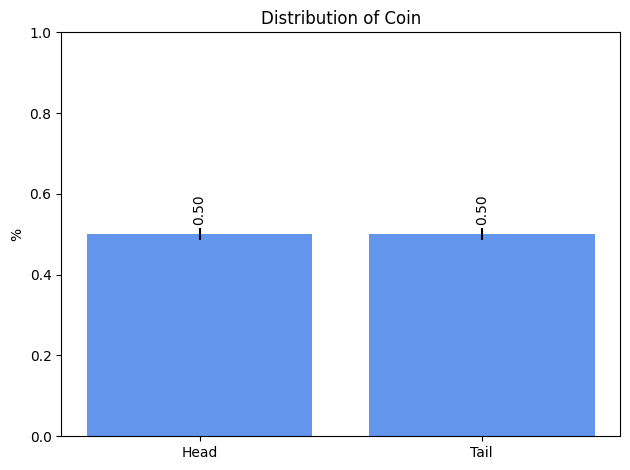

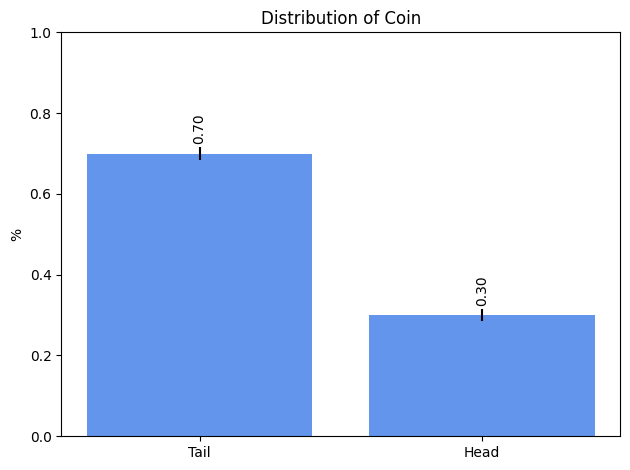

In [85]:
fair_coin = Coin().set([.5] * 2)
fair_coin.plot(view=True)

biased_coin = Coin().set([.3, .7])
biased_coin.plot(view=True)

In [86]:
biased_coin.p('Head')

TypeError: Argument must be iterable (got <class 'str'>).

In [ ]:
biased_coin.mpe()

# Random Variables

In ``pyjpt``, random variables are instances of the [jpt.variables.Variable](../autoapi/jpt/variables/index.html#jpt.variables.Variable) class. ``jpt.Variable`` itself is abstract so it cannot be instantiated directly. There exist three subclasses

  * [jpt.variables.SymbolicVariable](../autoapi/jpt/variables/index.html#jpt.variables.SymbolicVariable)
  * [jpt.variables.NumericVariable](../autoapi/jpt/variables/index.html#jpt.variables.NumericVariable)
  * [jpt.variables.IntegerVariable](../autoapi/jpt/variables/index.html#jpt.variables.IntegerVariable)

that implement the behavior of a variable of the respective type.

A variable is determined by its name and domain, which are passed as arguments in the variable object's constructor.
For instance, in order to instantiate two variables representing the result of the above coin tossing and dicing experiments, we create one integer and symbolic variable:

In [88]:
from jpt.variables import SymbolicVariable, IntegerVariable

coin = SymbolicVariable('CoinToss', domain=Coin)
die = IntegerVariable('Dice', domain=Die)

coin, die

(CoinToss[Coin], Dice[Die])

A variable object as such does not have much funcionality. Its main purpose is to bind a particular symbol in the domain of discource to the set of admissible values and to carry settings that are relevant for the learning and inference process.

# Variable Assignments

The datastructure that describes questions and answers in JPTs are almost always [jpt.variables.VariableAssignment](../autoapi/jpt/variables/index.html#jpt.variable.VariableAssignment).
A VariableAssignment, as the name suggests, assigns instances of [jpt.variables.Variable](../autoapi/jpt/variables/index.html#jpt.variable.Variable) reference to values of their doamin.
When creating queries and evidences for a JPT one is required to create VariableMaps or dict that map string to variable
values. Variable values can be one of the following things

  * singular values:
    Singular values refer to numbers (ints or floats) for numeric variables or one element of a variables domain
    (most likely a string or int or float)

  * sets:
    For discrete variables a set should be a python set of elements of a variables domain. For numeric variables it can
    be either a ContinuousSet or RealSet. A ContinuousSet is a simple interval with lower and upper bound.
    A RealSet is a set of intervals in the same sense as for discrete variables. Those sets are interpreted as
    the statement: the value of variables x A or B or C for a something like ``{"A", "B", "C"}``